In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential


<div class="alert alert-block alert-info"> <b><span style = "color:#000000">
 Data Preparation </span> </b>
    
* Load the dataset and prepare it for the model. <br><br>
    
* Resize the images, apply data augmentation, and split it into training and validation sets. <br><br>
--------------
-----
    

</div>

In [12]:
base_dir = 'PetImages'  # Update this path

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2)  # Splitting data: 80% for training, 20% for validation

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation')

Found 19968 images belonging to 2 classes.
Found 4991 images belonging to 2 classes.


<div class="alert alert-block alert-info"> <b><span style = "color:#000000">
 CNN Model Definition </span> </b>
    
* Define the CNN architecture using the 'Sequential' model <br><br>
--------------
-----
    

</div>

In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),  # Dropout for regularization
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (dog or cat)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


<div class="alert alert-block alert-info"> <b><span style = "color:#000000">
 Training the model </span> </b>
    
* Train the model with prepared dataset <br><br>
--------------
-----
    

</div>

In [16]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Callback for reducing the learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

history = model.fit(
    train_generator,
    steps_per_epoch=100,  # 50
    epochs=50,  # Increased epochs
    validation_data=validation_generator,
    validation_steps=50,  # Adjust based on the size of your validation set
    callbacks=[reduce_lr]
)

Epoch 1/50
100/100 [==============================] - 56s 549ms/step - loss: 0.6950 - accuracy: 0.4965 - val_loss: 0.6904 - val_accuracy: 0.5310 - lr: 0.0010
Epoch 2/50
100/100 [==============================] - 54s 537ms/step - loss: 0.6938 - accuracy: 0.5185 - val_loss: 0.7018 - val_accuracy: 0.4940 - lr: 0.0010
Epoch 3/50
100/100 [==============================] - 106s 1s/step - loss: 0.6935 - accuracy: 0.4830 - val_loss: 0.6908 - val_accuracy: 0.4880 - lr: 0.0010
Epoch 4/50
100/100 [==============================] - 114s 1s/step - loss: 0.6897 - accuracy: 0.5185 - val_loss: 0.6904 - val_accuracy: 0.5220 - lr: 0.0010
Epoch 5/50
100/100 [==============================] - 113s 1s/step - loss: 0.6876 - accuracy: 0.5252 - val_loss: 0.6821 - val_accuracy: 0.5420 - lr: 0.0010
Epoch 6/50
100/100 [==============================] - 109s 1s/step - loss: 0.6898 - accuracy: 0.5515 - val_loss: 0.6861 - val_accuracy: 0.5730 - lr: 0.0010
Epoch 7/50
100/100 [==============================] - 104s 1

<div class="alert alert-block alert-info"> <b><span style = "color:#000000">
 Plotting Training and Validation Accuracy and Loss </span> </b>
    
* Visualise training process with motplotlib <br><br>
--------------
-----
    

</div>

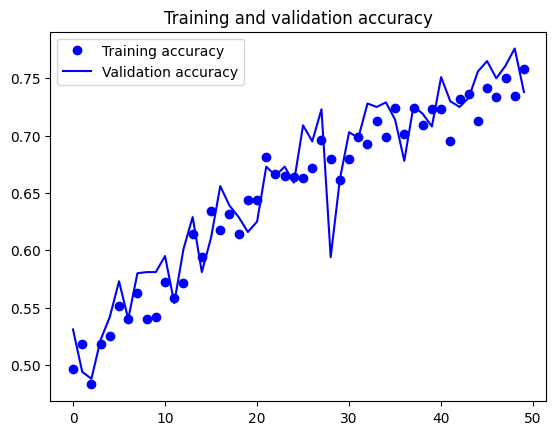

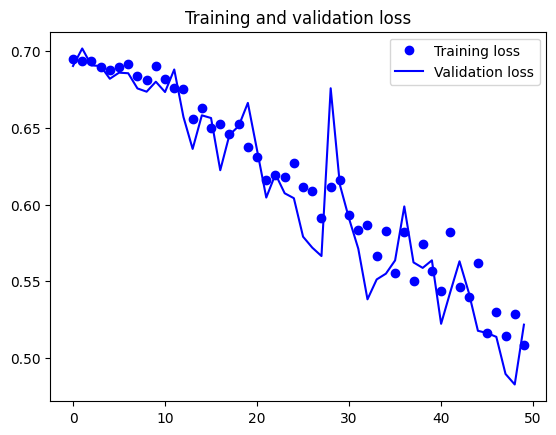

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


<div class="alert alert-block alert-info"> <b><span style = "color:#000000">
 Displaying Images with Predictions </span> </b>
    
* Writing a function to display images with their predicted and actual labels <br><br>
--------------
-----
    

</div>

1/1 [==============================] - 0s 41ms/step


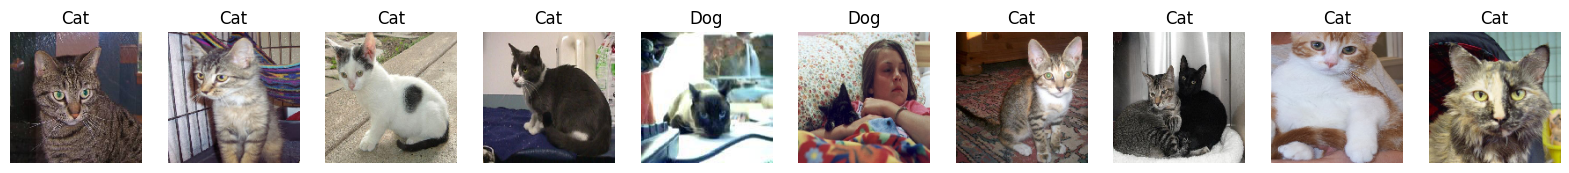

1/1 [==============================] - 0s 38ms/step


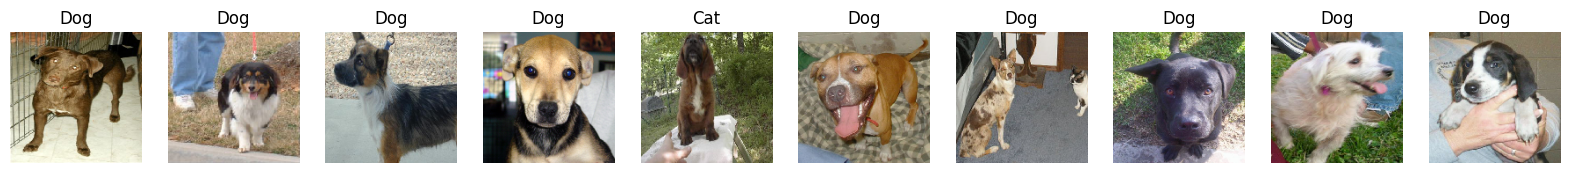

In [18]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

def plot_image_predictions(image_directory, model, num_images=5):
    plt.figure(figsize=(20, 4))  # Adjusting figure size for better visibility
    for i in range(num_images):
        img_path = f"{image_directory}/{i+1}.jpg"  # Adjust based on actual file naming
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.
        
        prediction = model.predict(img_array)
        predicted_class = "Dog" if prediction[0][0] > 0.5 else "Cat"
        
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(predicted_class)
        plt.axis('off')
    plt.show()

# Assuming 'test_cats_dir' and 'test_dogs_dir' are your test directories for cat and dog images
test_cats_dir = 'PetImages/Cat'
test_dogs_dir = 'PetImages/Dog'

# Display predictions for cats
plot_image_predictions(test_cats_dir, model, num_images=10)

# Display predictions for dogs
plot_image_predictions(test_dogs_dir, model, num_images=10)
